In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interp
from sklearn import svm, datasets
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import StratifiedKFold

In [2]:
iris = datasets.load_iris()
X = iris.data
y = iris.target

In [3]:
X = X[y != 2]
y = y[y != 2]

X.shape

(100, 4)

In [4]:
n_samples, n_features = X.shape

In [5]:
# Add noisy features
rs = np.random.RandomState(0)

X = np.c_[X , rs.randn(n_samples, 200 * n_features)]
X.shape

(100, 804)

In [6]:
classifier = svm.SVC(kernel='linear', probability=True, random_state=rs)

tprs = []
aucs = []
mean_fpr = np.linspace(0, 1, 100)

cv = StratifiedKFold(n_splits=6)

C:\Users\REZA\AppData\Local\Temp\ipykernel_3712\2085143856.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\REZA\AppData\Local\Temp\ipykernel_3712\2085143856.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\REZA\AppData\Local\Temp\ipykernel_3712\2085143856.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\REZA\AppData\Local\Temp\ipykernel_3712\2085143856.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy 2.0.0, use numpy.interp instead
  tprs.append(interp(mean_fpr, fpr, tpr))
C:\Users\REZA\AppData\Local\Temp\ipykernel_3712\2085143856.py:7: DeprecationWarning: scipy.interp is deprecated and will be removed in SciPy

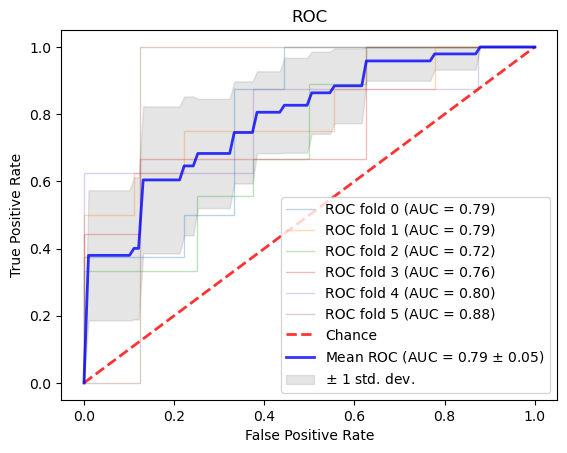

In [7]:
i = 0
for train, test in cv.split(X, y):
    probas_ = classifier.fit(X[train],y[train]).predict_proba(X[test] )

    fpr, tpr, thresholds = roc_curve(y[test], probas_[:, 1])

    tprs.append(interp(mean_fpr, fpr, tpr))
    tprs[-1][0] = 0.0

    roc_auc = auc(fpr, tpr)

    aucs.append(roc_auc)

    plt.plot(fpr, tpr, lw=1, alpha=0.3, label='ROC fold %d (AUC = %0.2f)' % (i, roc_auc))
    i += 1


plt.plot([0, 1], [0, 1], linestyle='--', lw=2, color='r', label='Chance', alpha=.8)
mean_tpr = np.mean(tprs, axis=0)
mean_tpr[-1] = 1.0
mean_auc = auc(mean_fpr, mean_tpr)
std_auc = np.std(aucs)

plt.plot(mean_fpr, mean_tpr, color='b', label=r'Mean ROC (AUC = %0.2f $\pm$ %0.2f)' % (mean_auc, std_auc),lw=2, alpha=.8)

std_tpr = np.std(tprs, axis=0)
tprs_upper = np.minimum(mean_tpr + std_tpr, 1)
tprs_lower = np.maximum(mean_tpr - std_tpr, 0)
plt.fill_between(mean_fpr, tprs_lower, tprs_upper, color='grey', alpha=.2,label=r'$\pm$ 1 std. dev.')

plt.xlim([-0.05, 1.05])
plt.ylim([-0.05, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC')
plt.legend(loc="lower right")
